# Trajectory-Based Continuous Collision Detection (T-CCD) For 2D Particle Systems

The idea here is to develop a mathematical model for the development of T-CCD.

Initial Idea:
- Use the **Point Of Intersection (POI)** to determine if the trajectory of 2 particles has the potential to collide.

Suggested Idea by Sir. Roland:
- Use Newton's second law of motion $(\vec{F} = m\vec{a})$.

Apply this ideas to Continuous Collision Detection (CCD).

## Initial Idea

- Let $\vec{p_1}$ and $\vec{p_2}$ be the initial positions of the 2 particles.
- Let $\vec{v_1}$ and $\vec{v_2}$ be their velocities.

The parametric motion,

$$
\begin{align}
\vec{r_1}(t) & = \vec{p_1} + \vec{v_1}t \\
\vec{r_2}(t) & = \vec{p_2} + \vec{v_2}t
\end{align}
$$

The intersection occurs when,

$$
\begin{align}
\vec{r_1}(t) & = \vec{r_2}(t) \\
\vec{p_1} + \vec{v_1}t & = \vec{p_2} + \vec{v_2}t
\end{align}
$$

Rearrange the equation into a linear form,

$$
(\vec{v_1} - \vec{v_2})t = \vec{p_2} - \vec{p_1} = \Delta \vec{v}
$$

This forms the system,

$$
\Delta \vec{v} = \begin{cases}
(v_{1x} - v_{2x})t & = \Delta \vec{v}_x \\
(v_{1y} - v_{2y})t & = \Delta \vec{v}_y
\end{cases}
$$

Definition of determinant,

$$
\begin{align}
\det(a, b) & = \vec{a} \times \vec{b} & (\text{Equivalent to } |\vec{a} \times \vec{b}| \text{ in 2D}) \\
& = a_x b_y - a_y b_x
\end{align}
$$

If the determinant of $\det(\vec{v_2}, \vec{v_1}) \neq 0$ then, define

$$
\Delta \vec{p} = \vec{p_2} - \vec{p_1}
$$

we can find the time it takes for the first particle to reach the intersection,

$$
\begin{align}
t_1 & = \frac{\det(\vec{v_2}, \Delta \vec{p})}{\det(\vec{v_2}, \vec{v_1})} \\
& = \frac{v_{2x} \Delta \vec{p}_y - v_{2y} \Delta \vec{p}_x}{v_{2x} v_{1y} - v_{2y} v_{1x}}
\end{align}
$$

Similarly, we can also find the time it takes for the second particle to reach the intersection,

$$
\begin{align}
t_2 & = \frac{\det(\vec{v_1}, \Delta \vec{p})}{\det(\vec{v_2}, \vec{v_1})} \\
& = \frac{v_{1x} \Delta \vec{p}_y - v_{1y} \Delta \vec{p}_x}{v_{2x} v_{1y} - v_{2y} v_{1x}}
\end{align}
$$

Doing so, we should have the following result,

$$
t = t_1 = t_2
$$

With this, we can find the point of intersection,

$$
POI = r_1(t) = r_2(t)
$$

When $\det(\vec{v_2}, \vec{v_1}) = 0$, then the objects are either **parallel** or **co-linear**, meaning no interrsection will occur.

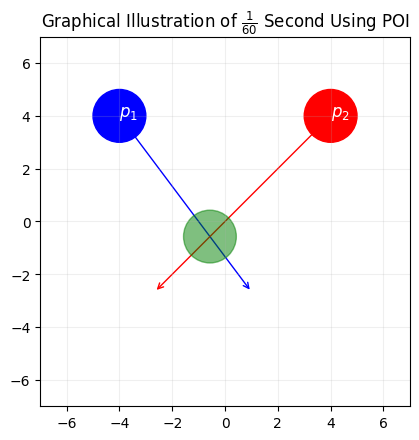

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Using `np.cross` does work but it is depricated for 2D array, thus this function exists.
def cross2d(a: np.ndarray[any], b: np.ndarray[any]) -> float:
    return a[0] * b[1] - a[1] * b[0]

# Particle size
radii = 1

# First frame out of 60 frames
ft = 1 / 60

# Initial position of Particle 1
p1 = np.array((-4.0, 4.0))
v1 = np.array((300.0, -400.0))

# Initial position of particle 2
p2 = np.array((4.0, 4.0))
v2 = np.array((-400.0, -400.0))

# Radius velocity of particle 1
r1 = p1 + v1 * ft

# Radius velocity of particle 2
r2 = p2 + v2 * ft

# Find the intersection using determinant
det = cross2d(v2, v1)

if (det != 0.0):
    dp = p2 - p1

    t = cross2d(v2, dp) / det

    poi = p1 + v1 * t

    plt.gca().add_patch(plt.Circle(poi, radii, color="green", alpha=0.5))

plt.title(r"Graphical Illustration of $\frac{1}{60}$ Second Using POI")

plt.gca().add_patch(plt.Circle(p1, radii, color="blue"))
plt.annotate(r"$p_1$", p1, color="white", fontsize=12)

plt.gca().add_patch(plt.Circle(p2, radii, color="red"))
plt.annotate(r"$p_2$", p2, color="white", fontsize=12)

plt.annotate("", xy=p1, xytext=r1, arrowprops=dict(arrowstyle="<-", color="blue", lw=1), zorder=0)
plt.annotate("", xy=p2, xytext=r2, arrowprops=dict(arrowstyle="<-", color="red", lw=1), zorder=0)

plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.gca().set_aspect("equal")

plt.grid(alpha=0.2)
plt.show()

Limitation to this idea:

- Unable to find the exact point/time where the 2 particles will collide.

A suggestion we found [online](https://math.stackexchange.com/questions/4815976/how-do-i-find-the-first-point-of-collision-of-2-circles-moving-in-a-2d-space), recommended using the **Pythagorean theorem**. This makes sense because it involves calculating the distance between two points using their **Cartesian coordinates**.

## Using Pythagorean Theorem

The initial approach using parametric motion helped find the potential point of intersection. However, it does not consider the actual size of the particles.

- Let $\vec{p_1}$ and $\vec{p_2}$ be the initial positions of the 2 particles.
- Let $\vec{v_1}$ and $\vec{v_2}$ be their velocities.
- Let $r_1$ and $r_2$ be their radius.

Using the distance formula, we can calculate the distance between the two objects at any given time $t$,

$$
d(t) = \sqrt{(x_2t - x_1t)^2 + (y_2t - y_1t)^2}
$$

A collision occurs when the sum of the radii of the two particles is equal to or greater than their distance,

$$
\begin{align}
d(t) & \leq r_1 + r_2 \\
\end{align}
$$

Using the formula we solve for $t$, we first define our variables,

$$
\begin{align}
\Delta \vec{p} & = \vec{p_2} - \vec{p_1} \\
\Delta \vec{v} & = \vec{v_2} - \vec{v_1}
\end{align}
$$

Substitute into the expanded form resulting in a standard quadratic equation,

$$
at^2 + bt + c = 0
$$

where,

$$
\begin{align}
a & = \Delta \vec{v}_x^2 + \Delta \vec{v}_y^2 \\
b & = 2(\Delta \vec{p}_x \Delta \vec{v}_x + \Delta \vec{p}_y \Delta \vec{v}_y) \\
c & = \Delta \vec{p}_x^2 + \Delta \vec{p}_y^2 - (r_1 + r_2)^2
\end{align}
$$

The quadratic formula provides the time at which the collision occurs,

$$
t = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

The earliest positive time of $t_{min}$ represents the time of the first collision. If the discriminant $(b^2 - 4ac) < 0$, then there is no collision. Link to [desmos](https://www.desmos.com/calculator/fap78jkujh) to verify.

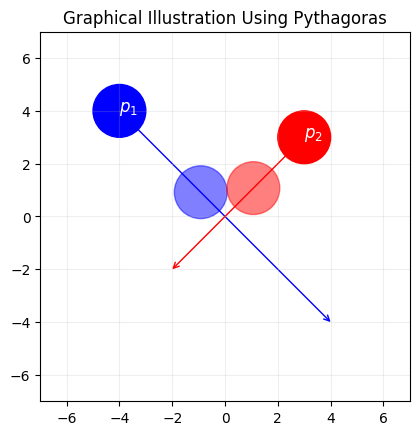

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Particle size
radii = 1

# Seconds
ft = 1

# Initial position of particle 1
p1 = np.array((-4.0, 4.0))
v1 = np.array((8, -8))

# Initial position of particle 2
p2 = np.array((3.0, 3.0))
v2 = np.array((-5.0, -5.0))

# Radius velocity of particle 1
r1 = p1 + v1 * ft

# Radius velocity of particle 2
r2 = p2 + v2 * ft

# Delta position
dp = p2 - p1
# Delta velocity
dv = v2 - v1

a = dv[0] ** 2 + dv[1] ** 2
b = 2 * (dp[0] * dv[0] + dp[1] * dv[1])
c = dp[0] ** 2 + dp[1] ** 2 - (radii + radii) ** 2

if (b ** 2 - 4 * a * c >= 0):
    t = min((-b + np.sqrt(b ** 2 - 4 * a * c)) / (2 * a), (-b - np.sqrt(b ** 2 - 4 * a * c)) / (2 * a))

    # Point of collision for particle 1
    c1 = p1 + v1 * t
    # point of collision for particle 2
    c2 = p2 + v2 * t

    plt.gca().add_patch(plt.Circle(c1, radii, color="blue", alpha=0.5))
    plt.gca().add_patch(plt.Circle(c2, radii, color="red", alpha=0.5))

plt.title(r"Graphical Illustration Using Pythagoras")

plt.gca().add_patch(plt.Circle(p1, radii, color="blue"))
plt.annotate(r"$p_1$", p1, color="white", fontsize=12)

plt.gca().add_patch(plt.Circle(p2, radii, color="red"))
plt.annotate(r"$p_2$", p2, color="white", fontsize=12)

plt.annotate("", xytext=p1, xy=r1, arrowprops=dict(arrowstyle="->", color="blue", lw=1, shrinkB=0), zorder=0)
plt.annotate("", xytext=p2, xy=r2, arrowprops=dict(arrowstyle="->", color="red", lw=1, shrinkB=0), zorder=0)

plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.gca().set_aspect("equal")

plt.grid(alpha=0.2)
plt.show()

Now that we have the point of collision for the 2 particles, we apply the formula for elastic collision, First, let's define the masses of the particles.

- Let $m_1$ and $m_2$ be the mass of the 2 particles.

Conservation of momentum equation,

$$
\begin{align}
m_1 v_1 + m_2 v_2 & = m_1 v_1' + m_2 v_2' \\
\implies m_1(v_1 - v_1') & = m_2(v_2 - v_2')
\end{align}
$$

Conservation of kinetic energy equation,

$$
\begin{align}
\frac{1}{2} (m_1 v_1^2 + m_2 v_2^2) & = \frac{1}{2} (m_1 v_1'^2 + m_2 v_2'^2) \\
\implies m_1(v_1^2 - v_1'^2) & = m_2(v_2^2 - v_2'^2)
\end{align}
$$

By dividing the two equations, we get,

$$
\begin{align}
\frac{m_1(v_1^2 - v_1'^2)}{m_1(v_1 - v_1')} & = \frac{m_2(v_2^2 - v_2'^2)}{m_2(v_2 - v_2')} \\
\implies v_1 + v_1' & = v_2 + v_2' \\
\implies v_1 - v_2 & = v_1' - v_2'
\end{align}
$$

To solve for $v_1'$ and $v_2'$ which are the final velocities of the two particles we have the following formula,

$$
\begin{align}
v_1' & = \frac{m_1 - m_2}{m_1 + m_2} v_1 + \frac{2m_2}{m_1 + m_2} v_2 \\
v_2' & = \frac{m_2 - m_1}{m_1 + m_2} v_2 + \frac{2m_1}{m_1 + m_2} v_1
\end{align}
$$

This formula is specifically for one-dimensional elastic collisions. While it is not the primary focus of this notebook, a similar approach can be applied to two-dimensional elastic collisions. To solve for $\vec{v_1'}$ and $\vec{v_2'}$, we have to first find the normal vector ($\hat{n}$) and the normal tangent ($\hat{n}$) of the center of mass of the collision ($\vec{x}$), which is already solved using the pythagoras theorem.

$$
\begin{align}
\hat{n} & = \frac{\vec{x_2} - \vec{\vec{x_1}}}{|x_2 - x_1|} \\
\hat{t} & = \begin{bmatrix} -\hat{n}_y \\ \hat{n}_x \end{bmatrix}
\end{align}
$$

Decompose the velocities into normal and tangent components,

$$
\begin{align}
v_{1n} = \vec{v_1} \cdot \hat{n}, & \vec{v_1t} = \vec{v_1} \cdot \hat{t} \\
v_{2n} = \vec{v_2} \cdot \hat{n}, & \vec{v-2t} = \vec{v_2} \cdot \hat{t}
\end{align}
$$

Using the formula for conservation of momentum, we apply the normal directions,

$$
\begin{align}
v_{1n}' & = \frac{m_1 - m_2}{m_1 + m_2} v_{1n} + \frac{2m_2}{m_1 + m_2} v_{2n} \\
v_{2n}' & = \frac{m_2 - m_1}{m_1 + m_2} v_{2n} + \frac{2_m1}{m_1 + m_2} v_{1n}
\end{align}
$$

The tangent components remain unchanged because there is no force acting along the tangential direction during the collision,

$$
\begin{align}
v_{1t}' = v_{1t}, && v_{2t}' = v_{2t}
\end{align}
$$

Finally, to find the final velocities apply the components of $\hat{n}$ and $\hat{t}$ relative to their velocities,

$$
\begin{align}
\vec{v_1}' & = v_{1n}' \hat{n} + v_{1t}' \hat{t} \\
\vec{v_2}' & = v_{2n}' \hat{n} + v_{2t}' \hat{t}
\end{align}
$$

Subtracting $\vec{v_1}'$ from $\vec{v_2}'$ we get,

$$
\begin{align}
\vec{v_1}' - \vec{v_2}' & = \left( \left( \frac{m_1 - m_2}{m_1 + m_2} v_{1n} + \frac{2m_2}{m_1 + m_2} \hat{t} \right) \hat{n} + v_{1t} \right) - (v_{1n} \hat{n} + v_{1t} \hat{t}) \\
& = \left( \frac{m_1 - m_2}{m_1 + m_2} v_{1n} + \frac{2m_2}{m_1 + m_2} v_{2n} - v_{1n} \right) \hat{n} \\
& = \left( \frac{-2m_2}{m_1 + m_2} v_{1n} + \frac{2m_2}{m_1 + m_2} v_{2n} \right) \hat{n} \\
& = \frac{2m_2}{m_1 + m_2} (v_{2n} - v_{1n}) \hat{n}
\end{align}
$$

Using this, we can substitute $v_{1n} = \vec{v_1} \cdot \hat{n}$ and $v_{2n} = \vec{v_2} \cdot \hat{n}$,

$$
\vec{v_1}' = \vec{v_1} + \frac{2m_2}{m_1 + m_2} ((\vec{v_2} - \vec{v_1}) \cdot \hat{n}) \hat{n}
$$

Substitute all values, we get,

$$
\begin{align}
\vec{v_1}' & = \vec{v_1} + \frac{2m_2}{m_1 + m_2} \cdot \frac{(\vec{v_2} - \vec{v_1}) \cdot (\vec{x_2} - \vec{x_1})}{|\vec{x_2} - \vec{x_1}|^2} (\vec{x_2} - \vec{x_1}) \\
\vec{v_2}' & = \vec{v_2} + \frac{2m_1}{m_1 + m_2} \cdot \frac{(\vec{v_1} - \vec{v_2}) \cdot (\vec{x_1} - \vec{x_2})}{|\vec{x_2} - \vec{x_1}|^2} (\vec{x_1} - \vec{x_2})
\end{align}
$$

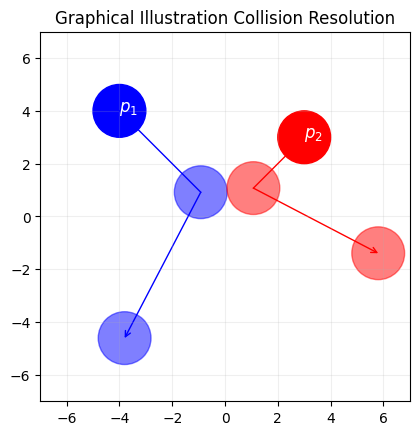

In [ ]:
if (b ** 2 - 4 * a * c >= 0):
    m = 1

    # Center of mass on the line of impacti
    x1 = c2 - c1
    x2 = x1 * -1

    # Distance
    mag = np.sqrt(x1.dot(x1)) # https://stackoverflow.com/questions/9171158/how-do-you-get-the-magnitude-of-a-vector-in-numpy

    # New  velocities
    v1_prime = v1 + 2 * m / (m + m) * dv.dot(x1) / mag ** 2 * x1
    v2_prime = v2 + 2 * m / (m + m) * (dv * -1).dot(x2) / mag ** 2 * x2

    r1f = c1 + v1_prime * (ft - t)
    r2f = c2 + v2_prime * (ft - t)

    plt.plot([p1[0], c1[0]], [p1[1], c1[1]], color="blue", lw=1)
    plt.annotate("", xytext=c1, xy=r1f, arrowprops=dict(arrowstyle="->", color="blue", lw=1, shrinkA=0, shrinkB=0), zorder=0)
    
    plt.plot([p2[0], c2[0]], [p2[1], c2[1]], color="red", lw=1)
    plt.annotate("", xytext=c2, xy=r2f, arrowprops=dict(arrowstyle="->", color="red", lw=1, shrinkA=0, shrinkB=0), zorder=0)

    plt.gca().add_patch(plt.Circle(r1f, radii, color="blue", alpha=0.5))
    plt.gca().add_patch(plt.Circle(r2f, radii, color="red", alpha=0.5))

    plt.gca().add_patch(plt.Circle(c1, radii, color="blue", alpha=0.5))
    plt.gca().add_patch(plt.Circle(c2, radii, color="red", alpha=0.5))
else:
    plt.annotate("", xytext=p1, xy=r1, arrowprops=dict(arrowstyle="->", color="blue", lw=1, shrinkA=0, shrinkB=0), zorder=0)
    plt.annotate("", xytext=p2, xy=r2, arrowprops=dict(arrowstyle="->", color="red", lw=1, shrinkA=0, shrinkB=0), zorder=0)

plt.title(r"Graphical Illustration Collision Resolution")

plt.gca().add_patch(plt.Circle(p1, radii, color="blue"))
plt.annotate(r"$p_1$", p1, color="white", fontsize=12)

plt.gca().add_patch(plt.Circle(p2, radii, color="red"))
plt.annotate(r"$p_2$", p2, color="white", fontsize=12)

plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.gca().set_aspect("equal")

plt.grid(alpha=0.2)
plt.show()

## Suggested Idea

$$
\vec{F} = m\vec{a}
$$